# Convolutional Neural Networks in TensorFlow

For this demonstration we will be using the CIFAR-10 dataset, which contains 60,000 images on ten classes:

1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck

It is readily available as a collection of 32 x 32 (x 3 for color) images from `tensorflow.keras.datasets`:

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

A CNN is just a regular neural network model, with an intervening set of one or more convolutional layers before feeding into the dense network (the 'top' of the model). In the following code, we add three convolutional layers (the last one with no pooling applied):

In [23]:
model = models.Sequential()

# Conv 1
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

# Conv 2
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# Conv 3
model.add(layers.Conv2D(64, (3,3), activation='relu'))

# Dense Neural Network
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3478 - loss: 1.7603 - val_accuracy: 0.5515 - val_loss: 1.2544
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5732 - loss: 1.2030 - val_accuracy: 0.5999 - val_loss: 1.1445
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6358 - loss: 1.0332 - val_accuracy: 0.6507 - val_loss: 0.9877
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6774 - loss: 0.9154 - val_accuracy: 0.6280 - val_loss: 1.0580
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7053 - loss: 0.8475 - val_accuracy: 0.6811 - val_loss: 0.9443
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7177 - loss: 0.7914 - val_accuracy: 0.6931 - val_loss: 0.8759
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7425 - loss: 0.7366 - val_accuracy: 0.6951 - val_loss: 0.8889
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7579 -

We can use the `summary()` method to get a view of the archicture, as well as the number of parameters in the model.

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

What is contained the convolutional layers? We can access them by directly accessing a layer in `model`. For instance, the very first layer in the model, index 0, is the first convolutional layer:

In [33]:
first_conv_layer = model.layers[0]
filters, biases = first_conv_layer.get_weights()

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

array([[[[0.7969019 , 0.40576297, 0.3337683 , 0.3801668 , 0.24571685,
          0.5893189 , 0.58980066, 0.39889926, 0.35811603, 0.40395758,
          0.7849473 , 0.7390302 , 0.53577995, 0.23609082, 0.54611135,
          0.7053118 , 0.71355915, 0.30306184, 0.7089373 , 0.43761504,
          0.64293385, 0.5441496 , 0.41641688, 0.30147702, 0.6950706 ,
          0.4002551 , 0.5456092 , 0.89345986, 0.13888167, 0.34794545,
          0.1402877 , 0.3761609 ],
         [0.37267178, 0.7579393 , 0.49808905, 0.37864175, 0.45236054,
          0.44229096, 0.9755499 , 0.31059   , 0.30440417, 0.31180593,
          0.75639474, 0.62302625, 0.5539965 , 0.17020984, 0.49501735,
          0.43633303, 0.42186865, 0.55805373, 0.59045124, 0.42362002,
          0.7414838 , 0.44642732, 0.5007029 , 0.3297568 , 0.57067   ,
          0.81188005, 0.5356445 , 0.9690761 , 0.44010016, 0.36630163,
          0.26244026, 0.3837142 ],
         [0.49028814, 0.6188148 , 0.38352   , 0.7995515 , 0.2608108 ,
          0.7254684 

These are the filters used for the images. These are collections of 3x3 matrices, which means we can plot them as we would regular images:

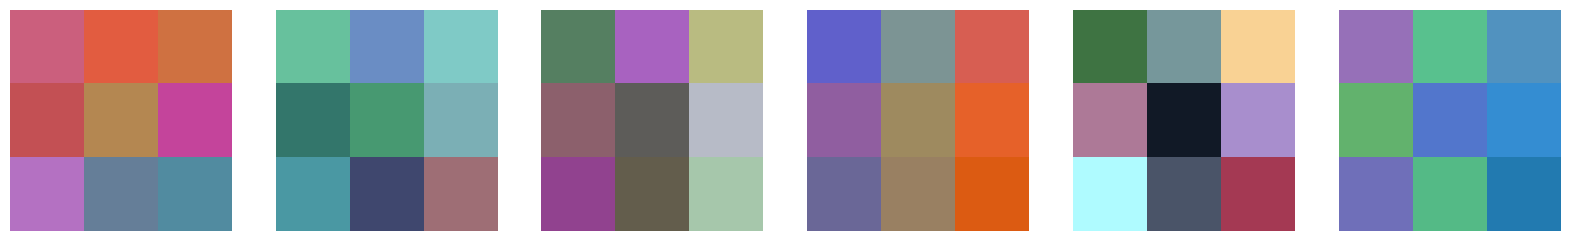

In [37]:
n_filters = 6
fig, axes = plt.subplots(1, n_filters, figsize=(20,5))
for i in range(n_filters):
    ax = axes[i]
    f = filters[:, :, :, i]
    ax.imshow(f)
    ax.axis('off')
plt.show()

More informative is the resulting 'feature maps' that result from applying these filters to an image. Suppose we wish to look the different feature maps obtained from the first image in the training set:

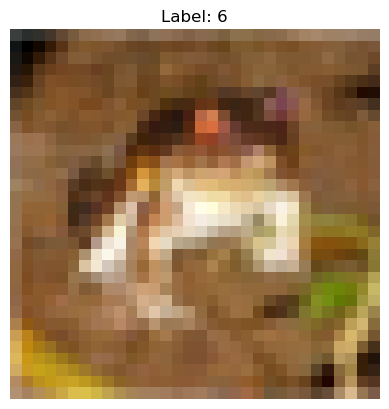

In [39]:
# Plot Image
plt.imshow(x_train[0])
plt.title(f'Label: {y_train[0][0]}')  # Display the corresponding label
plt.axis('off')  # Turn off axis labels
plt.show()  # Show the plot

The following obtains the feature maps and separates the layers so we can use the `predict()` method to get their resulting outputs:

In [45]:
# Get Feature Maps
from tensorflow.keras.models import Model

# Create a new model that outputs the feature maps
layer_outputs = [layer.output for layer in model.layers if isinstance(layer, layers.Conv2D)]
feature_map_model = Model(inputs=model.inputs, outputs=layer_outputs)

image = np.expand_dims(x_train[0], axis=0)  # Select the first image and add batch dimension

# Get the feature maps
feature_maps = feature_map_model.predict(image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


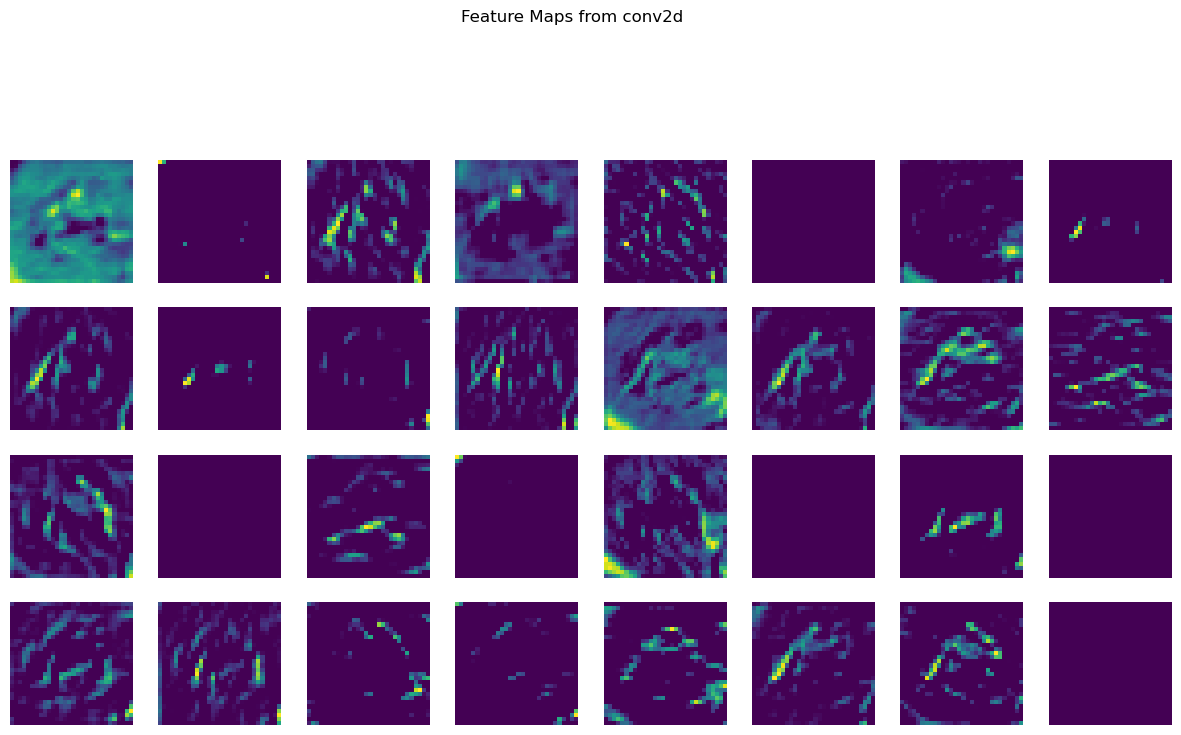

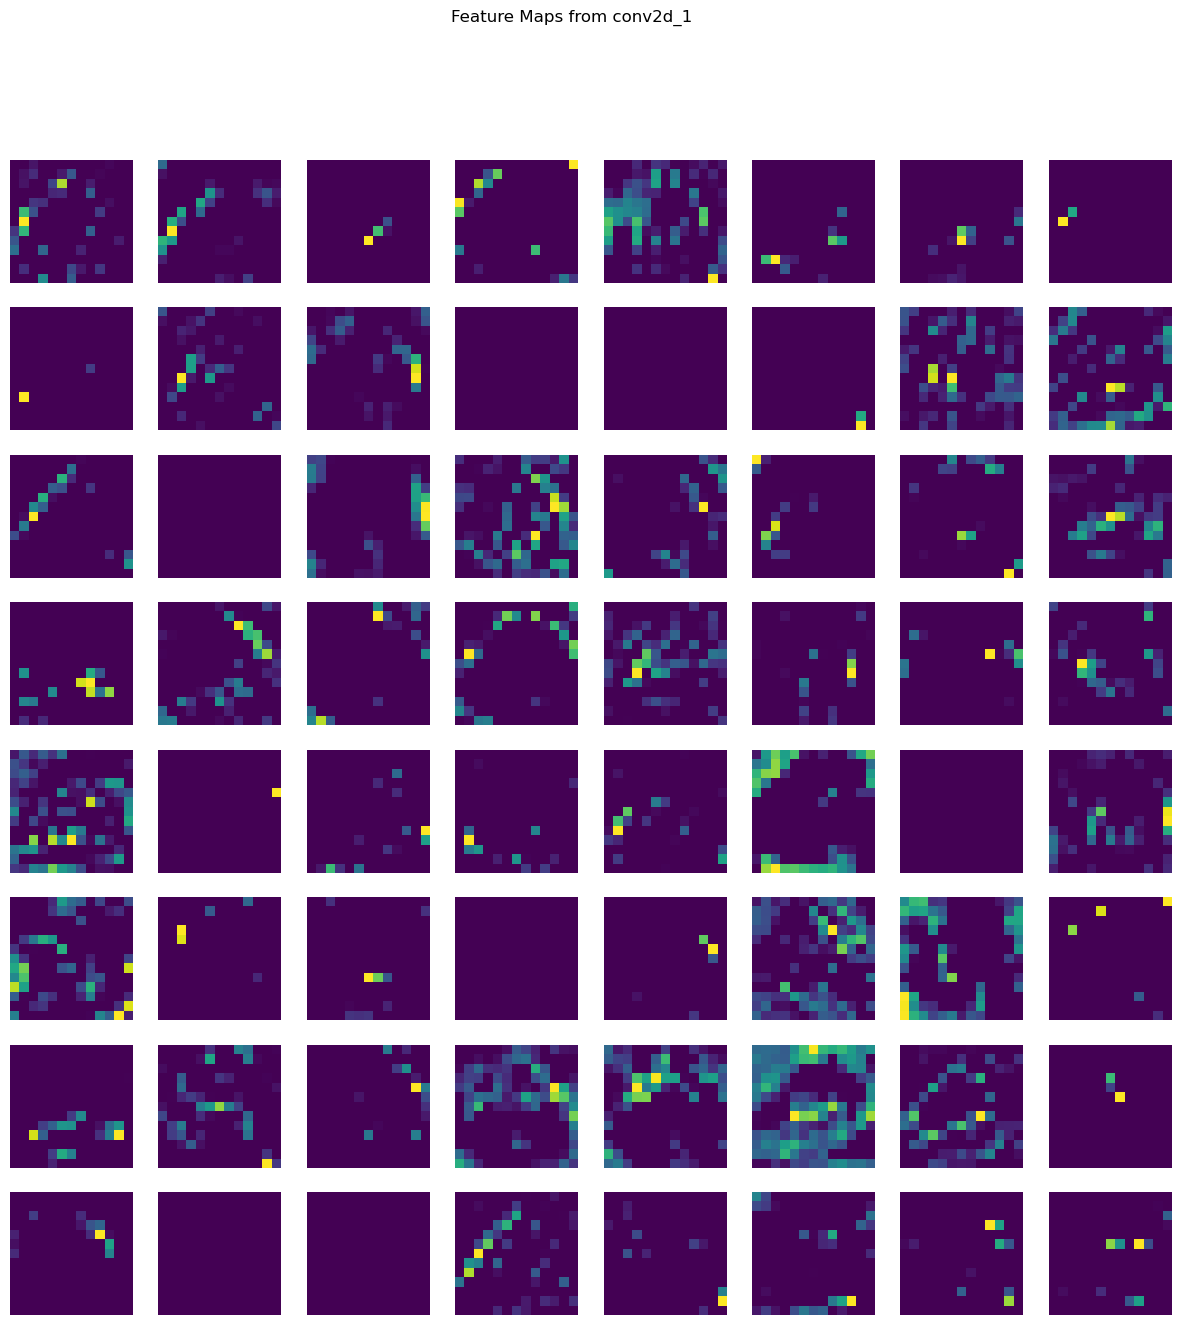

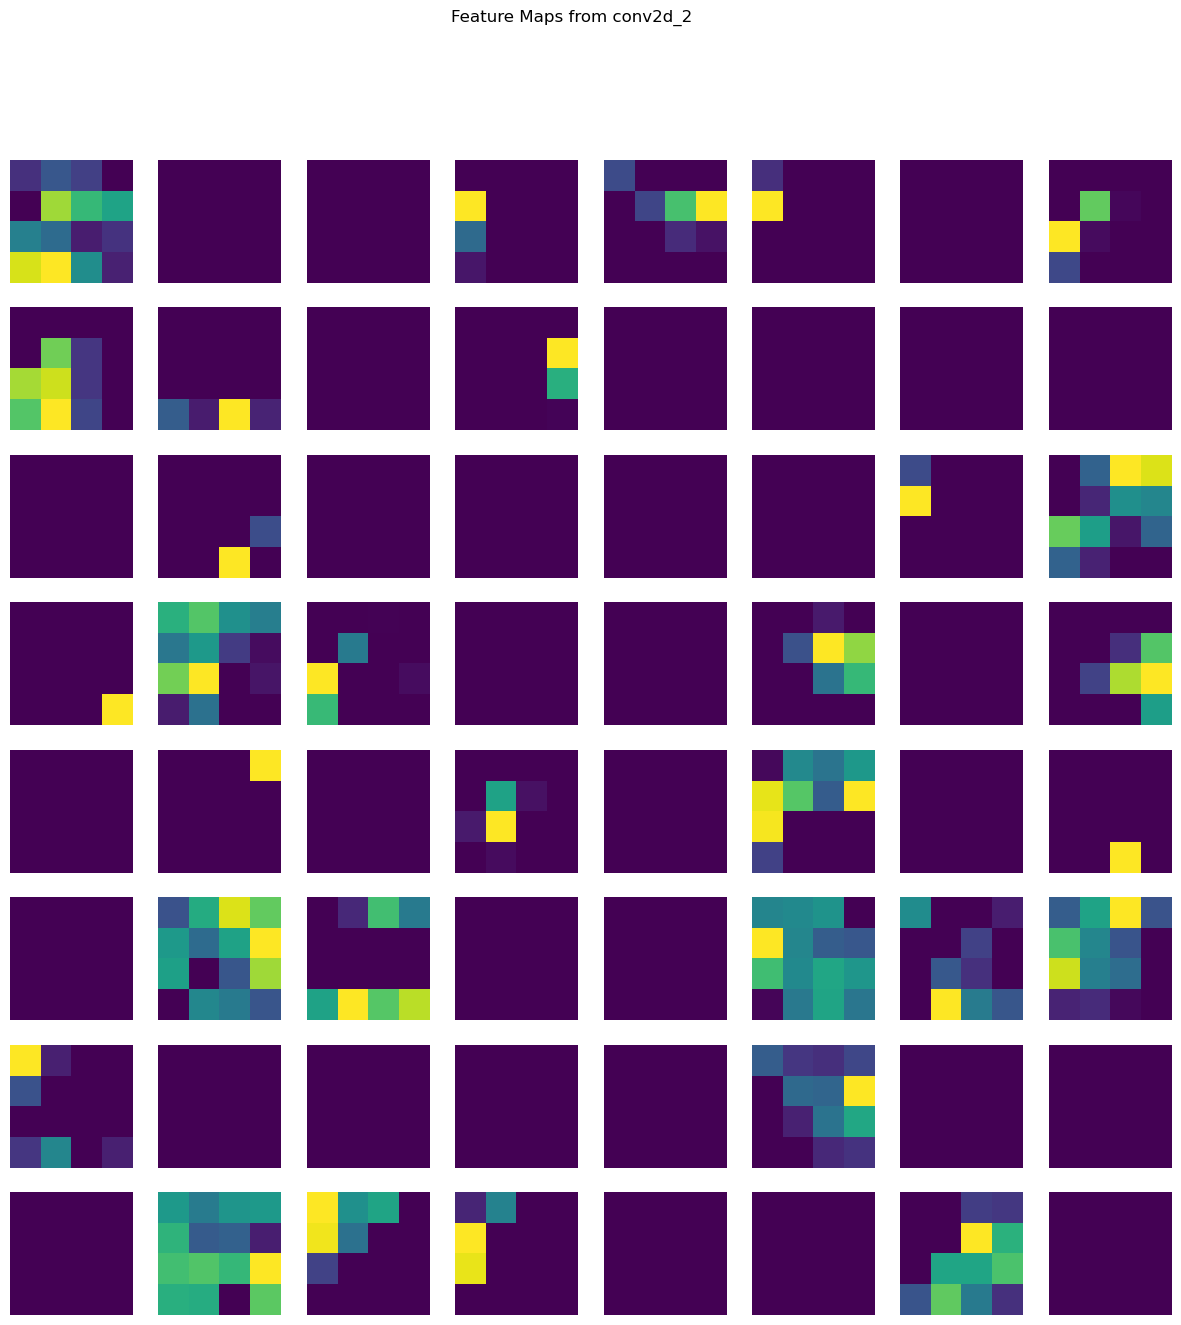

In [47]:
# Plot Feature Maps
def plot_feature_maps(feature_maps, layer_names):
    for layer_name, feature_map in zip(layer_names, feature_maps):
        num_feature_maps = feature_map.shape[-1]  # Get the number of feature maps
        size = feature_map.shape[1]  # Assuming square feature maps

        # Create a grid for plotting
        plt.figure(figsize=(15, 15))
        for i in range(num_feature_maps):
            plt.subplot(8, 8, i + 1)  # Adjust grid size as needed
            plt.imshow(feature_map[0, :, :, i], cmap='viridis')  # Show one feature map
            plt.axis('off')
        plt.suptitle(f'Feature Maps from {layer_name}')
        plt.show()

# Get layer names
layer_names = [layer.name for layer in model.layers if isinstance(layer, layers.Conv2D)]

# Plot feature maps for each convolutional layer
plot_feature_maps(feature_maps, layer_names)

In [ ]:
# Extracting the filters from the second Conv2D layer
second_conv_layer = model.layers[2]
filters, biases = second_conv_layer.get_weights()

# Normalize the filter values between 0 and 1 for visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plot the first 6 filters
n_filters = 6
fig, axes = plt.subplots(1, n_filters, figsize=(20, 5))
for i in range(n_filters):
    ax = axes[i]
    # Get the filter of shape (3, 3, 32) -> (Height, Width, Depth)
    # This layer has 32 input channels, so let's show only one channel for visualization
    f = filters[:, :, :, i]
    ax.imshow(f[:, :, 0], cmap='gray')  # Showing one channel of the filter
    ax.axis('off')
plt.show()

In [ ]:
# Extracting the filters from the third Conv2D layer
third_conv_layer = model.layers[4]
filters, biases = third_conv_layer.get_weights()

# Normalize the filter values between 0 and 1 for visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plot the first 6 filters
n_filters = 6
fig, axes = plt.subplots(1, n_filters, figsize=(20, 5))
for i in range(n_filters):
    ax = axes[i]
    # Get the filter of shape (3, 3, 64) -> (Height, Width, Depth)
    f = filters[:, :, :, i]
    ax.imshow(f[:, :, 0], cmap='gray')  # Showing one channel of the filter
    ax.axis('off')
plt.show()


But how well did the model perform against the testing set:

In [57]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7094 - loss: 0.8614
Test accuracy: 0.7073


Try and see if you can beat this benchmark by playing around with the convolutional layers in terms of number of parameters, size of the filters, and so on.